In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("C:/Users/SH/Desktop/ENGG2112/Major Project/Earthquakes 2010-2023X.csv")
data.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2010-01-29T23:22:52.490Z,51.841,177.738,48.2,3.6,ml,19.0,201.5,NaN,NaN,...,2018-07-06T19:53:37.173Z,"Rat Islands, Aleutian Islands, Alaska",earthquake,NaN,NaN,NaN,NaN,reviewed,aeic,aeic
1,2010-01-29T22:25:34.910Z,51.672,177.745,73.0,5.0,mb,218.0,115.0,NaN,0.86,...,2018-07-06T19:53:29.300Z,"Rat Islands, Aleutian Islands, Alaska",earthquake,NaN,2.8,NaN,104.0,reviewed,us,us
2,2010-01-29T20:47:53.200Z,1.585,-90.602,10.0,5.6,mwc,138.0,80.1,NaN,1.07,...,2022-05-02T21:35:53.294Z,"259 km N of Puerto Ayora, Ecuador",earthquake,NaN,NaN,NaN,NaN,reviewed,us,gcmt
3,2010-01-29T20:38:08.450Z,1.514,-90.714,10.0,5.2,mwc,35.0,159.9,NaN,1.15,...,2016-11-10T02:23:29.680Z,"253 km N of Puerto Ayora, Ecuador",earthquake,NaN,NaN,NaN,NaN,reviewed,us,gcmt
4,2010-01-29T17:52:23.040Z,4.726,-75.971,131.5,4.9,mwc,227.0,52.5,NaN,0.95,...,2022-07-16T01:38:25.589Z,"6 km WSW of Cartago, Colombia",earthquake,NaN,NaN,NaN,NaN,reviewed,us,gcmt


In [4]:
size = data.shape
print(size)

(243727, 22)


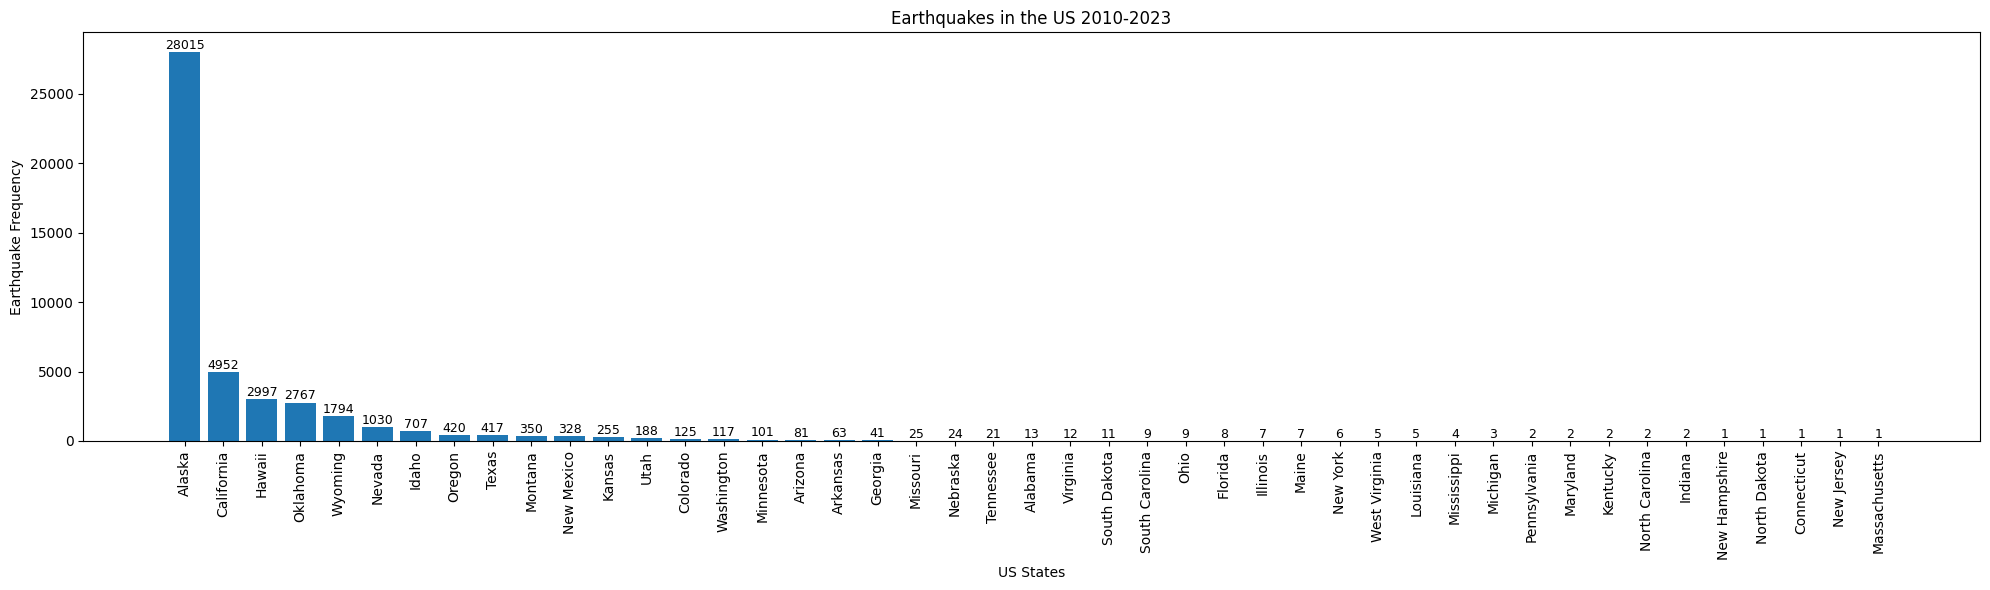

In [20]:
data['location'] = data['place'].str.split(',').str[-1].str.strip()
#frequency = data['location'].value_counts()
#locations = frequency.head(100)
america_states = {
    "AL": "Alabama", "AK": "Alaska", "AZ": "Arizona", "AR": "Arkansas",
    "CA": "California", "CO": "Colorado", "CT": "Connecticut", "DE": "Delaware",
    "FL": "Florida", "GA": "Georgia", "HI": "Hawaii", "ID": "Idaho", "IL": "Illinois",
    "IN": "Indiana", "IA": "Iowa", "KS": "Kansas", "KY": "Kentucky", "LA": "Louisiana",
    "ME": "Maine", "MD": "Maryland", "MA": "Massachusetts", "MI": "Michigan",
    "MN": "Minnesota", "MS": "Mississippi", "MO": "Missouri", "MT": "Montana",
    "NE": "Nebraska", "NV": "Nevada", "NH": "New Hampshire", "NJ": "New Jersey",
    "NM": "New Mexico", "NY": "New York", "NC": "North Carolina", "ND": "North Dakota",
    "OH": "Ohio", "OK": "Oklahoma", "OR": "Oregon", "PA": "Pennsylvania",
    "RI": "Rhode Island", "SC": "South Carolina", "SD": "South Dakota",
    "TN": "Tennessee", "TX": "Texas", "UT": "Utah", "VT": "Vermont",
    "VA": "Virginia", "WA": "Washington", "WV": "West Virginia",
    "WI": "Wisconsin", "WY": "Wyoming"
}

data['location'] = data['location'].replace(america_states)
state_names = list(america_states.values())
america_data = data[data['location'].isin(state_names)]
america_frequency = america_data['location'].value_counts()

plt.figure(figsize=(20,6))
plt.bar(america_frequency.index, america_frequency.values)
plt.xticks(rotation=90)
plt.xlabel("US States")
plt.ylabel("Earthquake Frequency")
plt.title("Earthquakes in the US 2010-2023")
plt.tight_layout()
for i, value in enumerate(america_frequency.values):
    plt.text(i, value + 5, str(value), ha='center', va='bottom', fontsize=9)
plt.show()




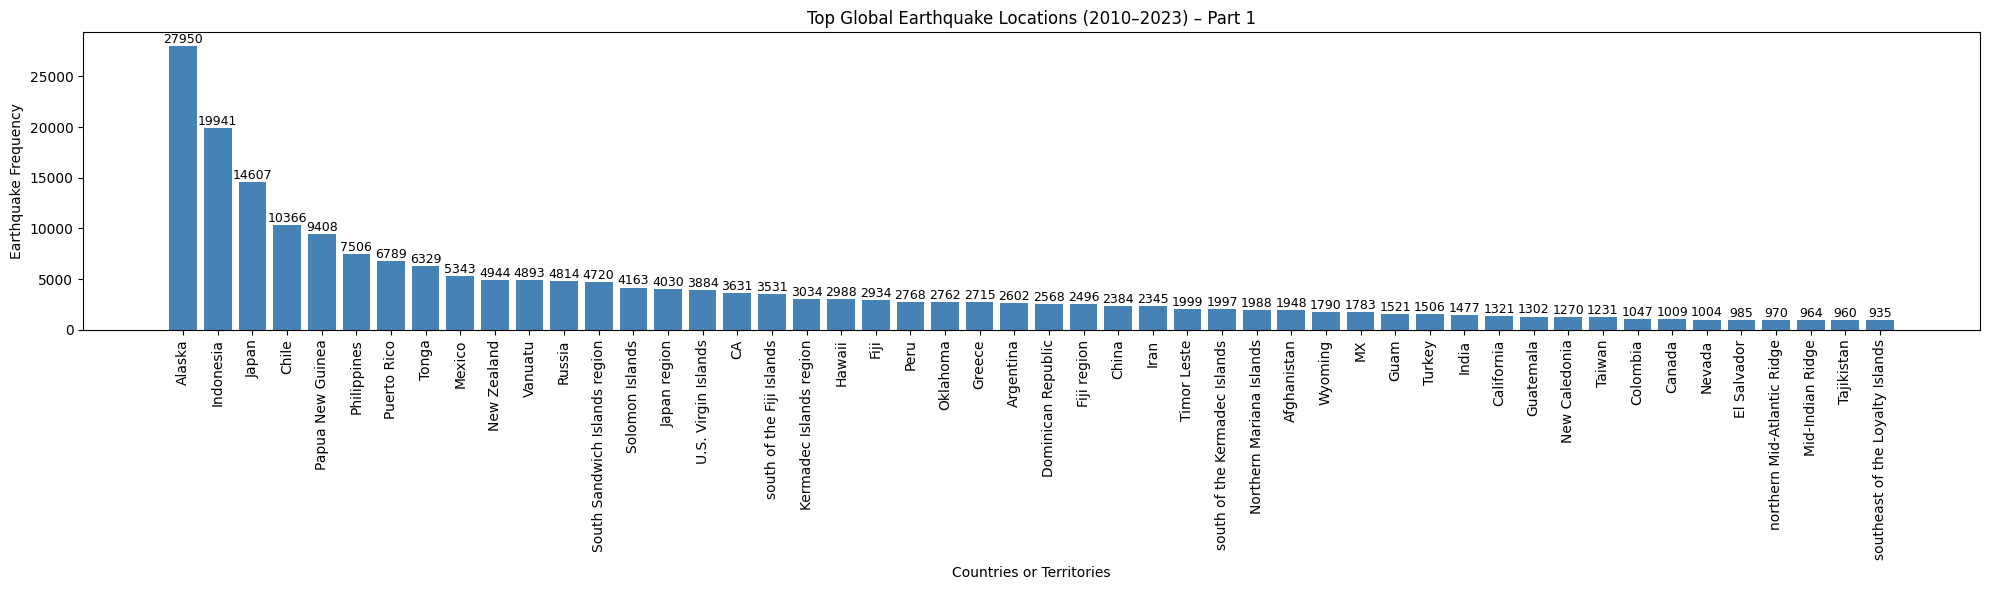

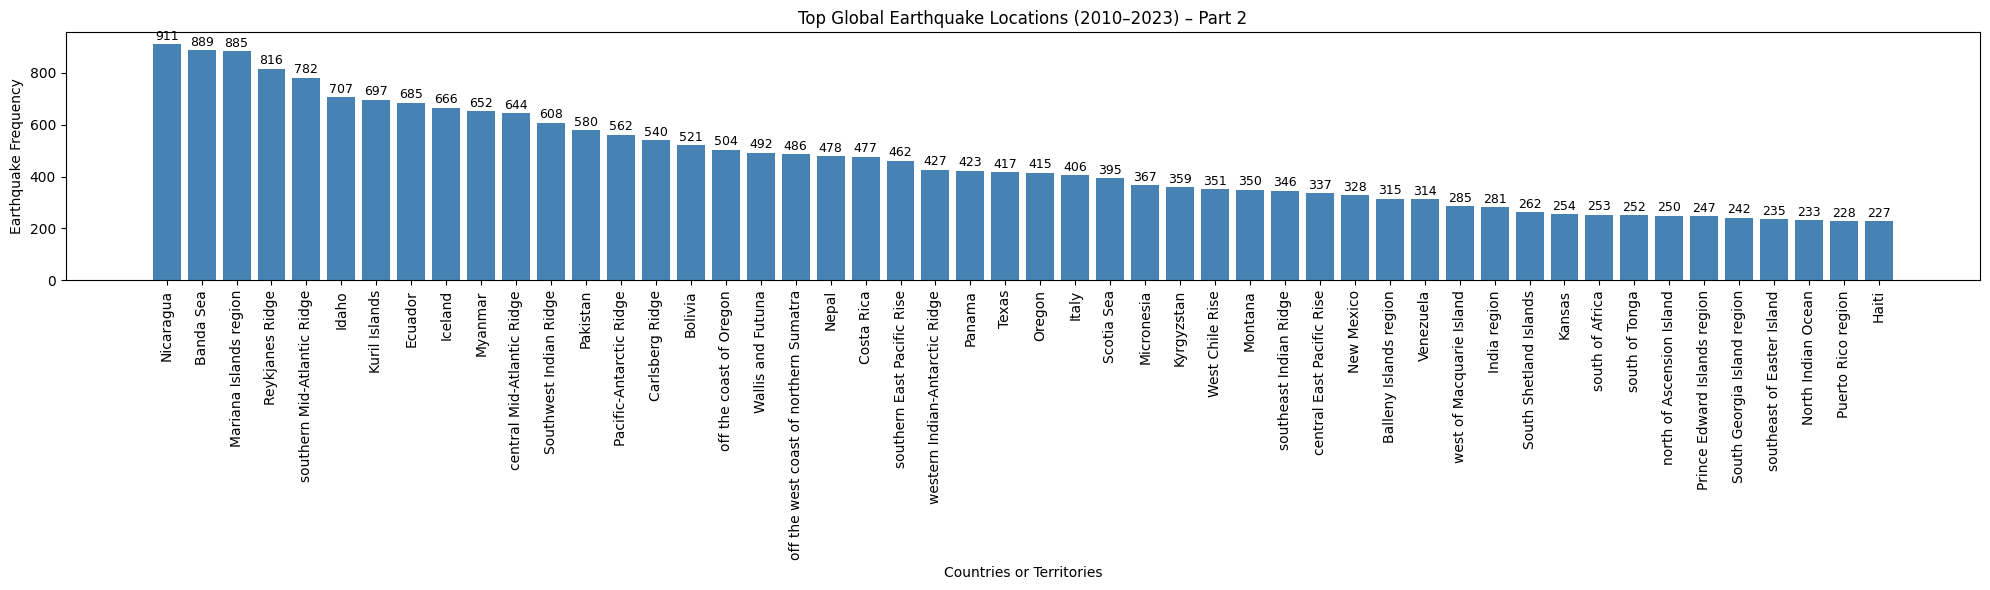

In [30]:
import math

# Get top 100 locations from the 'location' column
global_data = data['location']
global_frequency = global_data.value_counts().head(100)

chunk_size = 50
number_chunks = math.ceil(len(global_frequency) / chunk_size)
for i in range(number_chunks):
    chunk = global_frequency.iloc[i*chunk_size : (i+1)*chunk_size]
    
    plt.figure(figsize=(20,6))
    plt.bar(chunk.index, chunk.values, color='steelblue')
    plt.xticks(rotation=90)
    plt.xlabel("Countries or Territories")
    plt.ylabel("Earthquake Frequency")
    plt.title(f"Top Global Earthquake Locations (2010–2023) – Part {i+1}")
    plt.tight_layout()
    for j, value in enumerate(chunk.values):
        plt.text(j, value + 5, str(value), ha='center', va='bottom', fontsize=9)
    plt.show()

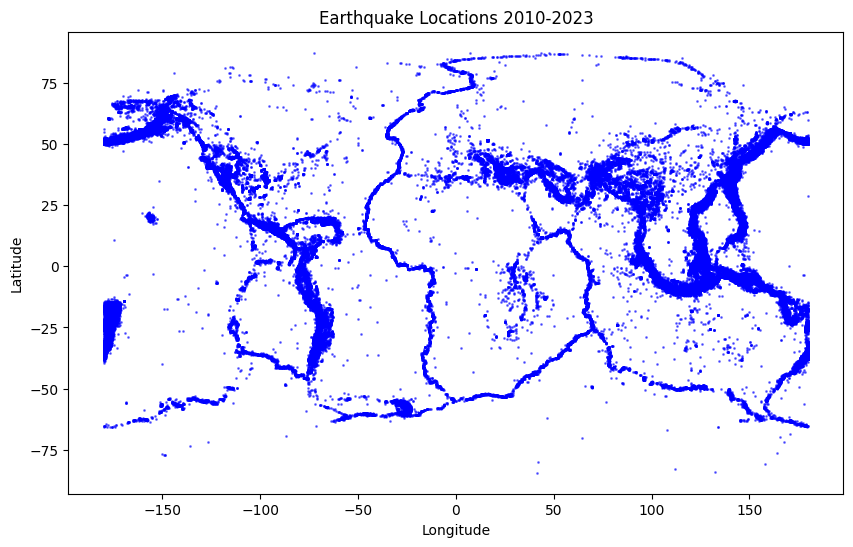

In [40]:
earthquake_data = data[data['type'] == 'earthquake']

x = earthquake_data['longitude']
y = earthquake_data['latitude']

plt.figure(figsize=(10,6))
plt.scatter(x, y, alpha=0.5, s=1, color = 'blue') 
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Earthquake Locations 2010-2023")
plt.show()


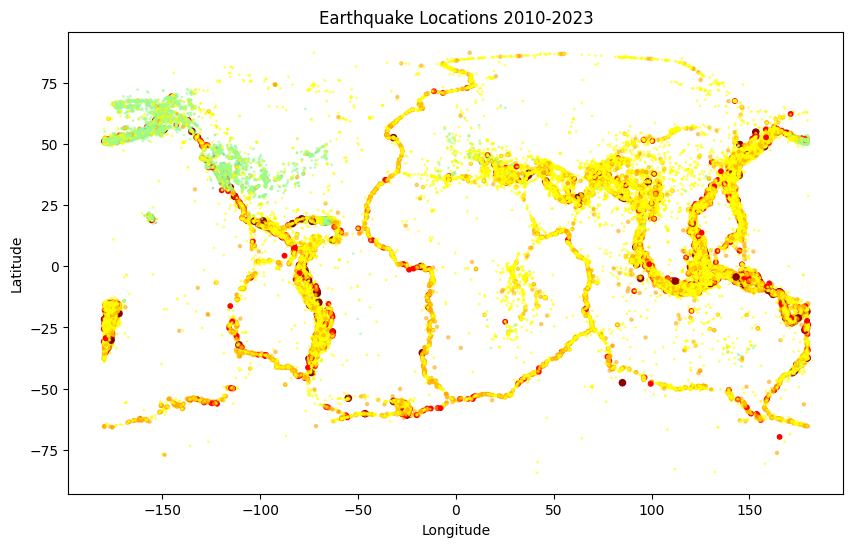

In [59]:
earthquake_data = data[data['type'] == 'earthquake']
x = earthquake_data['longitude']
y = earthquake_data['latitude']
magnitude = earthquake_data['mag']
colours = []
sizes = []
clarity = []
for mag in magnitude:
    if mag <= 3.5:
        colours.append('palegreen')
        sizes.append(1)
        clarity.append(0.5)
    elif 3.6 <= mag <= 5:
        colours.append('yellow')
        sizes.append(1)
        clarity.append(0.5)
    elif 3.6 <= mag <= 5:
        colours.append('gold')
        sizes.append(3)
        clarity.append(0.5)
    elif 5.1 <= mag <= 6:
        colours.append('orange')
        sizes.append(5)
        clarity.append(0.5)
    elif 6.1 <= mag <= 6.9:
        colours.append('red')
        sizes.append(10)
        clarity.append(1)
    elif mag >= 7.0:
        colours.append('darkred')
        sizes.append(20)
        clarity.append(1)
    else:
        colours.append('gray') 
        sizes.append(1)
        clarity.append(0.3)

plt.figure(figsize=(10,6))
plt.scatter(x, y, c = colours, s=sizes, alpha= clarity) 
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Earthquake Locations 2010-2023")
plt.show()
